In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_skew = pd.read_csv("Titanic_ML.csv", usecols=["Fare"])

In [1]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Almost Normal Distribution", fontsize=15)
sns.kdeplot(data = df_skew["Sulfate"])
plt.subplot(1,2,2)
plt.title("Skewed Distribution", fontsize=15)
sns.boxplot(data = df_skew["Fare"], palette="Dark2")
plt.show()

NameError: name 'plt' is not defined

<img src=https://cdn.discordapp.com/attachments/517815672613503006/874185466637877318/unknown.png>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:nexa">
    <b>1. Trimming</b> is the method of cutting off or getting rid of the outliers at the end of the dataset. This is easier than all the other methods. <br>
    <b>2. Capping</b> is setting a limit for the feature and set the value of all the outliers exceeding the limit to the value of the limit. So in the student example, we will set a limit of score and change the score of the 2% student to that. For example, 75 is the max score limit that we set. The score of 2% outlier students will be set to 75. <br>
    <b>3. Percentile</b> method is equal percentile on both the sides to detect outliers. Once you detect these outliers you can use either trimming or capping to get rid of them.
</div>

## Trimming & Standard Deviation

In [4]:
#defining lower and upper limit
norm_upper_limit = df_skew["Sulfate"].mean() + 3 * df_skew["Sulfate"].std()
norm_lower_limit = df_skew["Sulfate"].mean() - 3 * df_skew["Sulfate"].std()

In [5]:
#trimming the outliers away and we only have the distribution in 3 standard deviation
df_normal_new = df_normal[(df_normal["Sulfate"] > norm_lower_limit) & (df_normal["Sulfate"] < norm_upper_limit)]

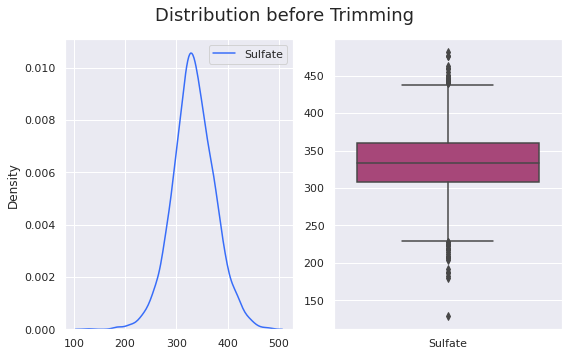

In [6]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Trimming", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_normal)
plt.subplot(1,2,2)
sns.boxplot(data = df_normal, palette="magma")
plt.tight_layout()
plt.show()

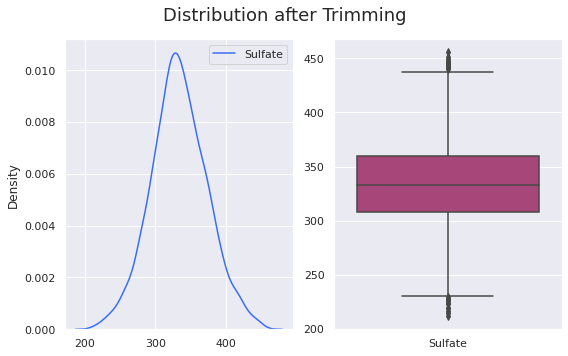

In [7]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Trimming",fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_normal_new)
plt.subplot(1,2,2)
sns.boxplot(data = df_normal_new, palette="magma")
plt.tight_layout()
plt.show()

 ## Capping & Inter-Quartile Range (IQR)

In [8]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_skew["Fare"].quantile(0.25)
q2 = df_skew["Fare"].quantile(0.75)

In [9]:
#finding out the value of Inter Quartile Range
IQR = q2 - q1

In [10]:
#defining max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 

In [11]:
#capping
df_skew_new = pd.DataFrame(np.where(df_skew["Fare"] > max_limit, max_limit, (np.where(df_skew["Fare"] < min_limit, min_limit, df_skew["Fare"]))), columns=["Fare"])

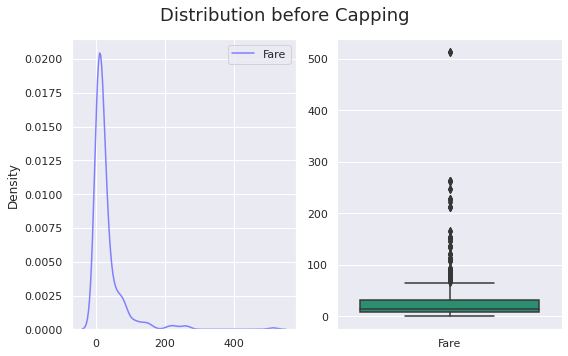

In [12]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_skew, palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df_skew, palette="Dark2")
plt.tight_layout()
plt.show()

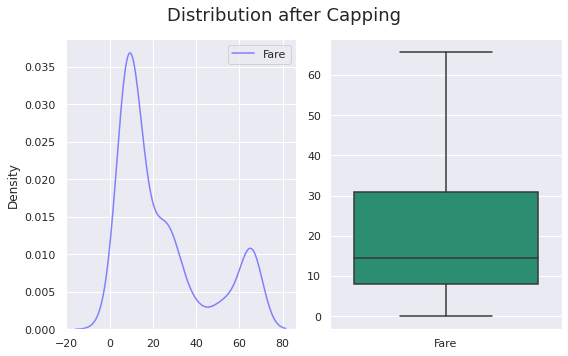

In [13]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Capping",fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_skew_new, palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df_skew_new, palette="Dark2")
plt.tight_layout()
plt.show()